In [1]:
import os
import scipy.io.wavfile as wavfile
from IPython.display import Audio

In [ ]:
# Loading training data
base_dir = r"Signal Processing Datasets/BirdSongDataset/train"
cardinalis_dir = os.path.join(base_dir, 'CardinalisCardinalis')
melospiza_dir = os.path.join(base_dir, 'MelospizaMelodia')


In [ ]:
# samples dictionary
samples = {}

for species, directory in zip(["Cardinalis Cardinalis", "Melospiza Melodia"],[cardinalis_dir, melospiza_dir]):
    samples[species] = []
    if os.path.isdir(directory):  
        for file_name in os.listdir(directory)[:5]:  # Loading 5 samples
            file_path = os.path.join(directory, file_name)
            sample_rate, audio_data = wavfile.read(file_path)
            samples[species].append((audio_data, sample_rate))
            print(f"Loaded {file_name} from {species} at sample rate {sample_rate} Hz")
            display(Audio(audio_data, rate=sample_rate))
    else:
        print(f"Directory {directory} does not exist.")

Loaded (1).wav from Cardinalis Cardinalis at sample rate 22050 Hz


Loaded (10).wav from Cardinalis Cardinalis at sample rate 22050 Hz


Loaded (100).wav from Cardinalis Cardinalis at sample rate 22050 Hz


Loaded (11).wav from Cardinalis Cardinalis at sample rate 22050 Hz


Loaded (12).wav from Cardinalis Cardinalis at sample rate 22050 Hz


Loaded (1).wav from Melospiza Melodia at sample rate 22050 Hz


Loaded (10).wav from Melospiza Melodia at sample rate 22050 Hz


Loaded (100).wav from Melospiza Melodia at sample rate 22050 Hz


Loaded (11).wav from Melospiza Melodia at sample rate 22050 Hz


Loaded (12).wav from Melospiza Melodia at sample rate 22050 Hz


In [10]:
import scipy.fft as fft
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# FFT on Cardinalis  and Melospiza
def plot_fft(audio_data, sample_rate, title):
    # number of sample 
    N = len(audio_data)
    # applying FFT
    fft_values = fft.fft(audio_data)
    # frequencies corresponding to FFT
    fft_freqs = fft.fftfreq(N, d=1/sample_rate)
    # positive frequencies
    plt.figure(figsize=(10, 6))
    plt.plot(fft_freqs[:N//2], np.abs(fft_values[:N//2])**2 / N)
    plt.title(f"Frequency Spectrum of {title}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density")
    plt.show()


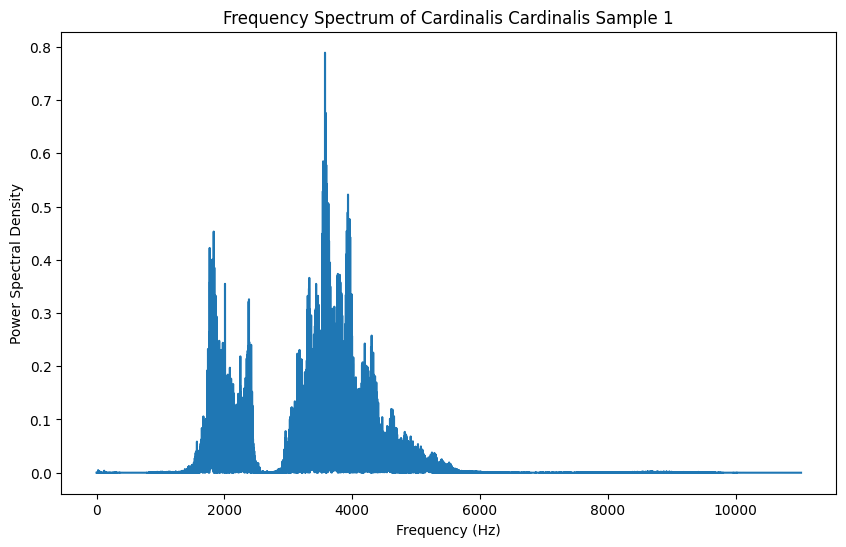

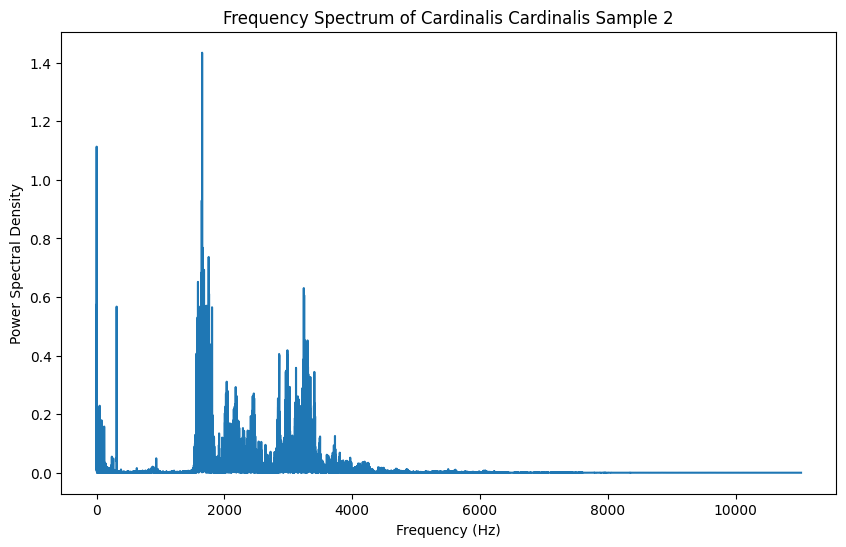

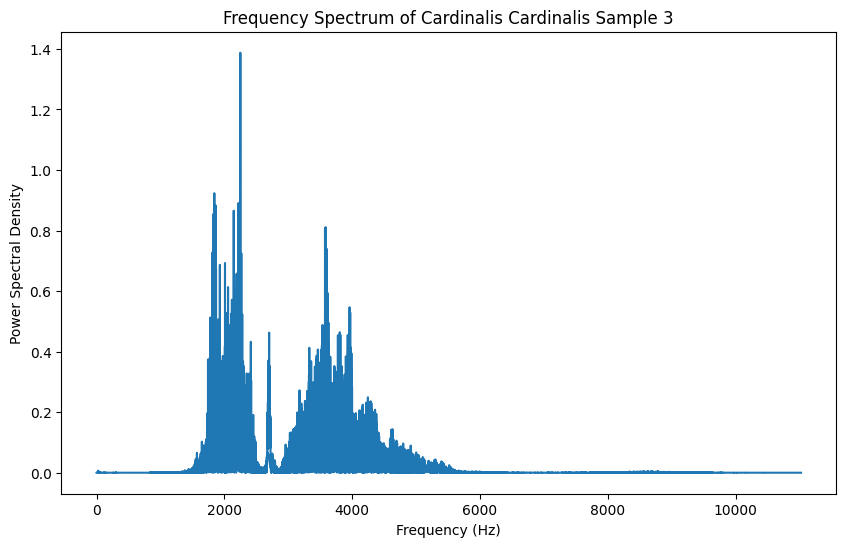

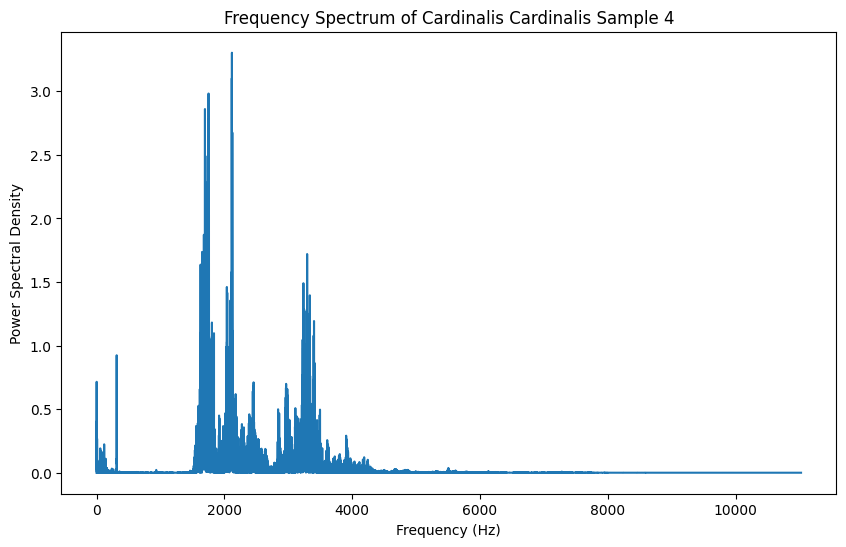

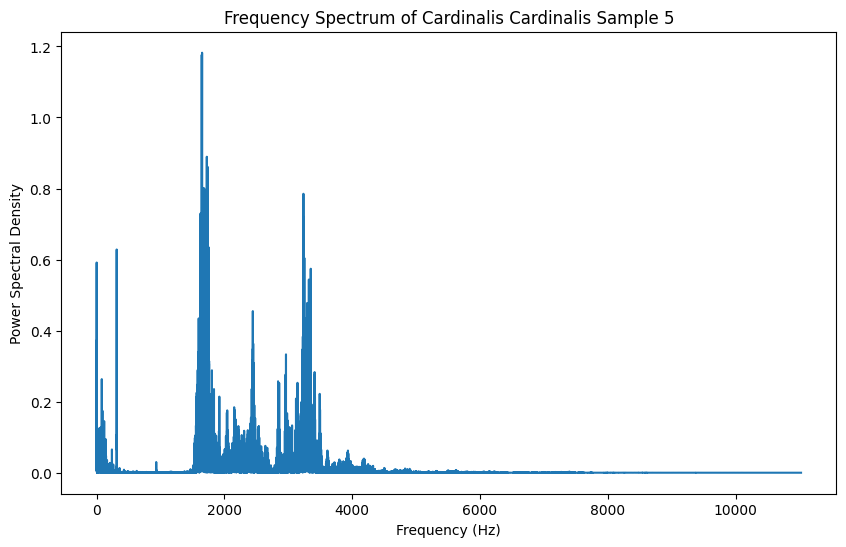

In [ ]:
# FFT on the 5 Cardinalis samples
for idx, (audio_data, sample_rate) in enumerate(samples["Cardinalis Cardinalis"]):
    title = f"Cardinalis Cardinalis Sample {idx + 1}"
    plot_fft(audio_data, sample_rate, title)

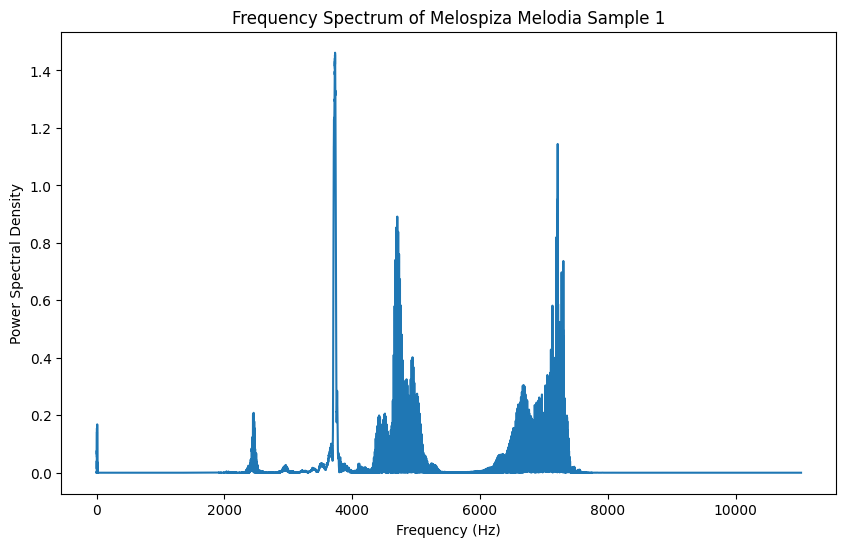

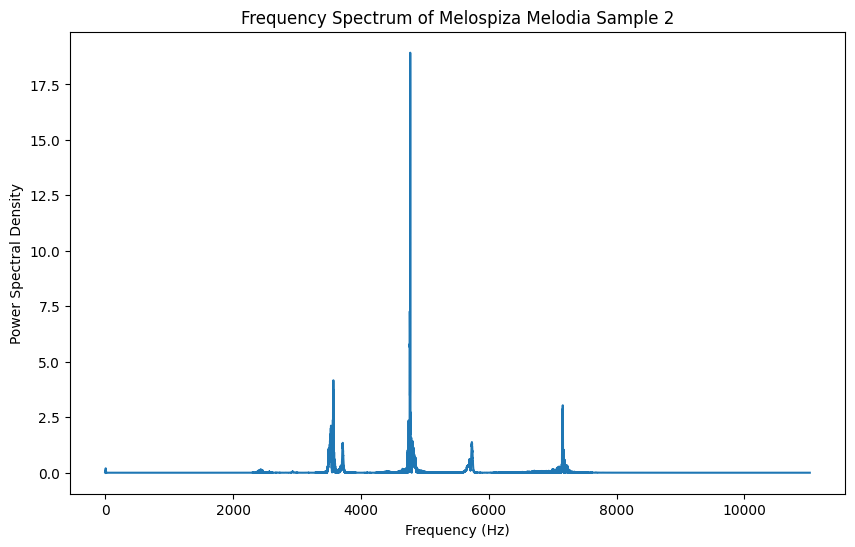

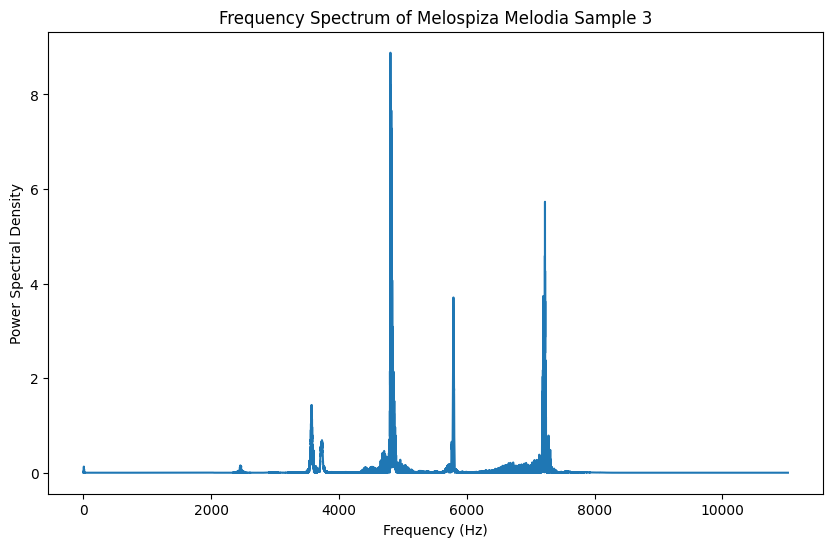

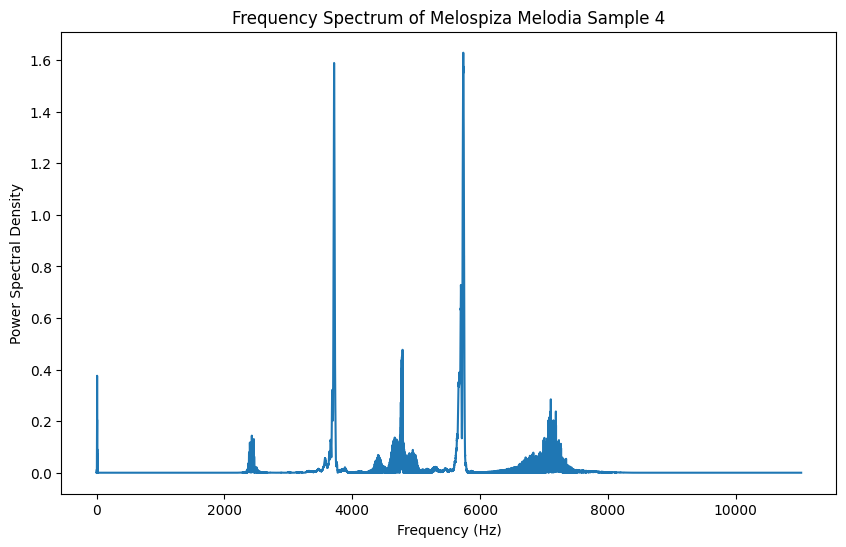

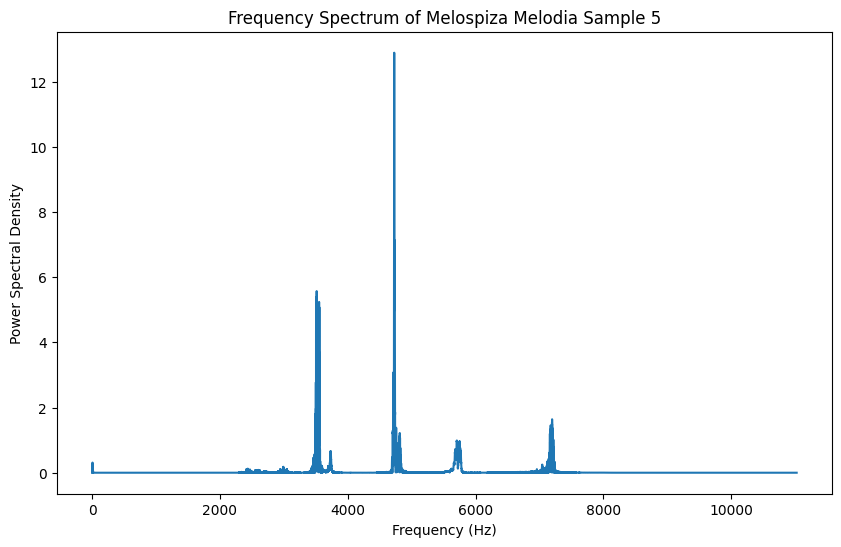

In [ ]:
# FFT on the 5 Melospiza samples
for idx, (audio_data, sample_rate) in enumerate(samples["Melospiza Melodia"]):
    title = f"Melospiza Melodia Sample {idx + 1}"
    plot_fft(audio_data, sample_rate, title)
